In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [81]:
def plot_nwords(sconf):
    data = {}
    for n_topics in (50, 75):
        counts = [x.strip() for x in open("communities/LDA_Eval_Seeded/topics_" + str(n_topics) + "/nwords.txt").readlines()]
        counts = list(map(lambda n: int(n), counts[0].split(", ")))
        data[n_topics] = counts   
    for n_topics in (100, 200, 300):
        counts = [x.strip() for x in open("communities/LDA_Eval_Seeded/topics_" + str(n_topics) + "/seeded/500-n_words_per_topic_" + str(sconf) + ".txt").readlines()]
        counts = list(map(int, counts))
        data[n_topics] = counts    
    for k,v in data.items():
        plt.violinplot(v,  positions=[k/100], showmeans=True)
    #plt.title("seed confidence: " + str(sconf))
    plt.xticks((0.5, 0.75, 1, 2, 3), (50, 75, 100, 200, 300))
    plt.xlabel("ntopics")
    plt.ylabel("Number of Words per Topic")
    plt.savefig("nwords_ntopics.pdf")

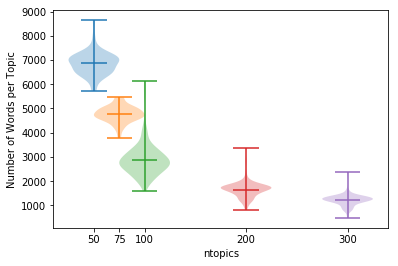

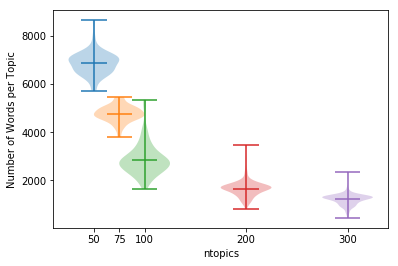

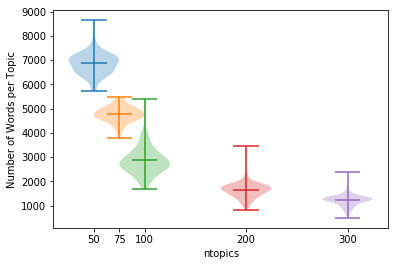

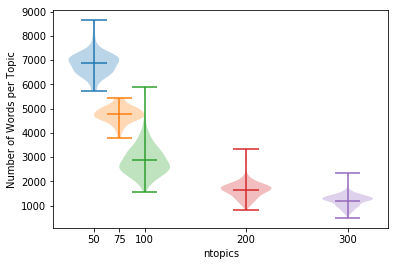

In [82]:
for c in (0.5, 0.7, 0.9, 1):
    plot_nwords(c)
    plt.show()

In [83]:
def plot_coherence(sconf):
    data = {}
    for n_topics in (50, 75):
        counts = [x.strip() for x in open("communities/LDA_Eval_Seeded/topics_" + str(n_topics) + "/coherence.txt").readlines()]
        counts = list(map(lambda n: float(n), counts[0].split(", ")))
        data[n_topics] = counts   
    for n_topics in (100, 200, 300):
        counts = [x.strip() for x in open("communities/LDA_Eval_Seeded/topics_" + str(n_topics) + "/seeded/500-coherence_per_topic_" + str(sconf) + ".txt").readlines()]
        counts = list(map(float, counts))
        data[n_topics] = counts    

    for k,v in data.items():
        plt.violinplot(v,  positions=[k/100], showmeans=True)
    #plt.title("seed confidence: " + str(sconf))
    plt.xticks((0.5, 0.75, 1, 2, 3), (50, 75, 100, 200, 300))
    plt.xlabel("ntopics")
    plt.ylabel("Topic Coherence")
    plt.savefig("coherence_ntopics.pdf")

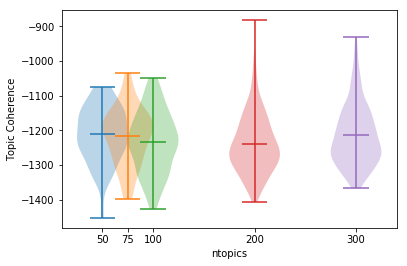

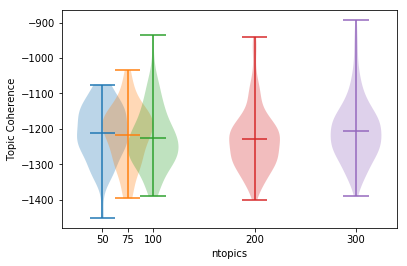

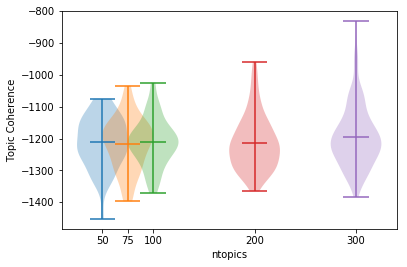

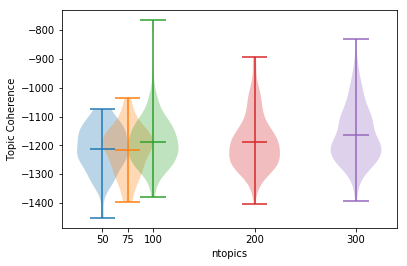

In [84]:
for c in (0.5, 0.7, 0.9, 1):
    plot_coherence(c)
    plt.show()

In [85]:
def plot_perplexity(sconf):
    data = {}
    for n_topics in (50, 75):
        counts = [x.strip() for x in open("communities/LDA_Eval_Seeded/topics_" + str(n_topics) + "/perplexity.txt").readlines()]
        counts = list(map(lambda n: float(n), counts[0].split(", ")))
        data[n_topics] = counts   
    for n_topics in (100, 200, 300):
        counts = [x.strip() for x in open("communities/LDA_Eval_Seeded/topics_" + str(n_topics) + "/seeded/500-perplexity_per_topic_" + str(sconf) + ".txt").readlines()]
        counts = list(map(float, counts))
        data[n_topics] = counts    

    for k,v in data.items():
        plt.violinplot(v,  positions=[k/100], showmeans=True)
    #plt.title("seed confidence: " + str(sconf))
    plt.xticks((0.5, 0.75, 1, 2, 3), (50, 75, 100, 200, 300))
    plt.xlabel("ntopics")
    plt.ylabel("Topic Perplexity")
    plt.savefig("perplexity_ntopics.pdf")

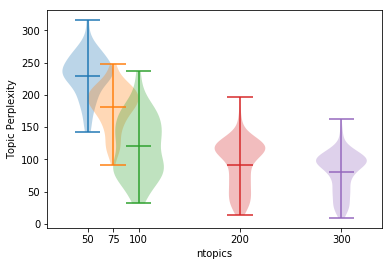

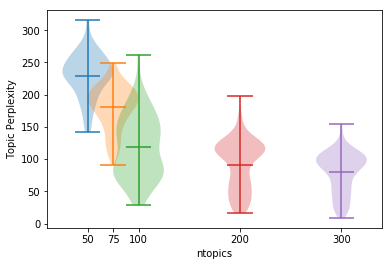

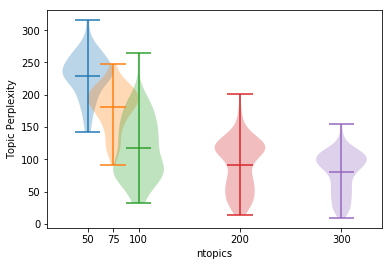

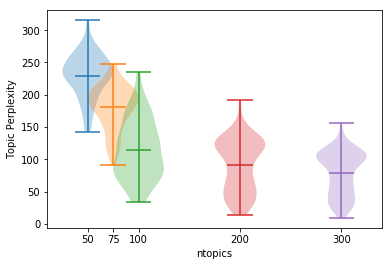

In [86]:
for c in (0.5, 0.7, 0.9, 1):
    plot_perplexity(c)
    plt.show()

In [44]:
def plot_sconf_vs_ppl():
    d = {100: [],
         200: [],
         300: []
        }
    for i in (100, 200, 300):
        counts = [x.strip() for x in open("/home/florian/Dokumente/Research/Mirco/communities/LDA_Eval_Seeded/topics_" + str(i) + "/non_seeded/500-perplexity_per_topic.txt").readlines()]
        counts = list(map(float, counts))
        d[i].append(np.median(counts))
        
        for conf in (0.5, 0.7, 0.9, 1):
            counts = [x.strip() for x in open("/home/florian/Dokumente/Research/Mirco/communities/LDA_Eval_Seeded/topics_" + str(i) + "/seeded/500-perplexity_per_topic_" + str(conf) + ".txt").readlines()]
            counts = list(map(float, counts))
            d[i].append(np.mean(counts))
    print(d)
    #confs = (0, 0.5, 0.7, 0.9, 1)
    confs = [0, 0.5, 0.7, 0.9, 1]
    
    fig, ax = plt.subplots()
    
    width = 0.03
    
    
    rects1 = ax.bar(list(map(lambda n: n-0.03, confs)), d[100], width, label='ntopics = 100')
    rects2 = ax.bar(confs, d[200], width, label='ntopics = 200')
    rects3 = ax.bar(list(map(lambda n: n+0.03, confs)), d[300], width, label='ntopics = 300')
    
    ax.set_ylabel('Mean Topic Perplexity')
    #    ax.set_title('Scores by group and gender')
    ax.set_xticks(confs)
    ax.set_xticklabels(confs)
    ax.set_xlabel('Seed Confidence')
    ax.legend(loc="best")
    ax.set_ylim([70, 140])
    #plt.grid()
    plt.savefig("sconf_vs_perplexity_bar.pdf")
    
    
    #ax1 = plt.bar(confs, d[100], ":")
    #ax2 = plt.bar(confs, d[200], "--")
    #ax3 = plt.bar(confs, d[300], "-.")
    #plt.legend((ax1[0], ax2[0], ax3[0]), ("ntopics = 100", "ntopics = 200", "ntopics = 300"))
    #plt.xlabel("Seed Confidence")
    #plt.ylabel("Mean Topic Perplexity")
    #plt.ylim([-0.05, 0.55])
    #plt.savefig("sconf_vs_perplexity.pdf")

{100: [131.54844069958085, 119.98063952974125, 118.83231249472028, 116.97923434630867, 114.96579168350297], 200: [99.03629457675285, 91.83805870283454, 91.55699661402986, 91.05676688624604, 90.8141214887263], 300: [85.29730132593052, 80.13873314105062, 79.87793040943379, 79.61021092337073, 78.91296282553326]}


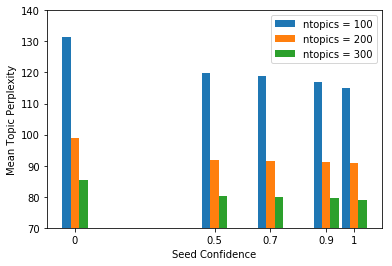

In [45]:
plot_sconf_vs_ppl()

In [40]:
def plot_sconf_vs_coherence():
    d = {100: [],
         200: [],
         300: []
        }
    for i in (100, 200, 300):
        counts = [x.strip() for x in open("/home/florian/Dokumente/Research/Mirco/communities/LDA_Eval_Seeded/topics_" + str(i) + "/non_seeded/500-coherence_per_topic.txt").readlines()]
        counts = list(map(float, counts))
        d[i].append(np.median(counts))
        
        for conf in (0.5, 0.7, 0.9, 1):
            counts = [x.strip() for x in open("/home/florian/Dokumente/Research/Mirco/communities/LDA_Eval_Seeded/topics_" + str(i) + "/seeded/500-coherence_per_topic_" + str(conf) + ".txt").readlines()]
            counts = list(map(float, counts))
            d[i].append(np.mean(counts))
    print(d)
    #confs = (0, 0.5, 0.7, 0.9, 1)
    #ax1 = plt.plot(confs, d[100], ":")
    #ax2 = plt.plot(confs, d[200], "--")
    #ax3 = plt.plot(confs, d[300], "-.")
    #plt.legend((ax1[0], ax2[0], ax3[0]), ("ntopics = 100", "ntopics = 200", "ntopics = 300"))
    #plt.xlabel("Seed Confidence")
    #plt.ylabel("Mean Topic Coherence")
    #plt.ylim([-0.05, 0.55])
    #plt.savefig("sconf_vs_coherence.pdf")
    confs = [0, 0.5, 0.7, 0.9, 1]
    
    fig, ax = plt.subplots()
    
    width = 0.03
    
    for k, v in d.items():
        d[k] = [-1 * x for x in d[k]]
    
    rects1 = ax.bar(list(map(lambda n: n-0.03, confs)), d[100], width, label='ntopics = 100')
    rects2 = ax.bar(confs, d[200], width, label='ntopics = 200')
    rects3 = ax.bar(list(map(lambda n: n+0.03, confs)), d[300], width, label='ntopics = 300')
    
    ax.set_ylabel('Mean Topic Coherence')
    #    ax.set_title('Scores by group and gender')
    ax.set_xticks(confs)
    ax.set_xticklabels(confs)
    ax.set_yticklabels([-1000, -1050, -1100, -1150, -1200, -1250, -1300])
    ax.set_ylim([1000, 1300])
    ax.set_xlabel('Seed Confidence')
    ax.legend()
    #plt.grid()
    plt.savefig("sconf_vs_coherence_bar.pdf")

{100: [-1237.7856976731773, -1233.3374261314193, -1227.3010276653017, -1210.831261616519, -1188.192911637152], 200: [-1291.3549962230295, -1239.281350149889, -1229.9557591716057, -1212.8278780923547, -1189.5096837778667], 300: [-1262.4324847722405, -1214.5573642488066, -1205.630339686721, -1196.2341539637803, -1163.2182414631154]}


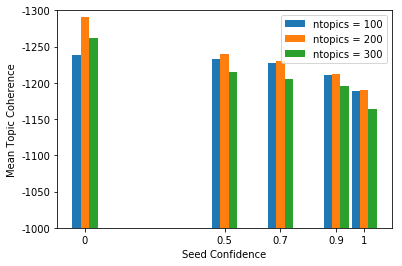

In [41]:
plot_sconf_vs_coherence()